In [1]:
import pandas as pd
import numpy as np

dataset_path = "C:\\Users\\mvy48\\OneDrive\\Desktop\\vscodeprograms\\ml_labsessions\\lab4\\DCT_malayalam_char 1.xlsx"
dataset = pd.read_excel(dataset_path)

unique_classes = np.unique(dataset.iloc[:, -1].values)

print("Unique Class Labels:", unique_classes)


class_label_1 = unique_classes[0]
class_label_2 = unique_classes[1]

#Feature Extraction
features = dataset.iloc[:, :-1].values 
labels = dataset.iloc[:, -1].values 

class_means = []
class_spreads = []

for cls in [class_label_1, class_label_2]:
    class_data = features[labels == cls]
    
    class_mean = np.mean(class_data, axis=0)
    class_spread = np.std(class_data, axis=0)
    
    class_means.append(class_mean)
    class_spreads.append(class_spread)

distance_between_classes = np.linalg.norm(class_means[0] - class_means[1])


print("Mean (centroid) of Class", class_label_1, ":", class_means[0])
print("Mean (centroid) of Class", class_label_2, ":", class_means[1])
print("Spread (standard deviation) of Class", class_label_1, ":", class_spreads[0])
print("Spread (standard deviation) of Class", class_label_2, ":", class_spreads[1])
print("Distance between mean vectors of Class", class_label_1, "and Class", class_label_2, ":", distance_between_classes)


Unique Class Labels: [3333 3334 3335 3337 3342 3343 3346 3349 3350 3351 3352 3353 3354 3355
 3356 3357 3358 3359 3360 3361 3362 3363 3364 3365 3366 3367 3368 3370
 3371 3372 3373 3374 3375 3376 3377 3378 3379 3380 3381 3382 3383 3384
 3385 3450 3451 3452 3453 3454]
Mean (centroid) of Class 3333 : [ 3.58633575e+04  2.55422561e+01  5.07739731e+01  2.44589984e+03
  6.38411004e+01  2.69666274e+03 -2.44676186e+00  8.16625621e+00
  1.13231816e+01 -4.39964682e+01 -5.39899155e+02 -1.52418531e+02
 -2.49165880e+03 -1.26027678e+02 -1.02287386e+03 -1.15444639e+02
 -1.24579262e+02 -9.20639913e+01 -9.74580575e+01 -7.69002500e+01
 -9.99765969e+01 -1.47786738e+02  1.53296278e+02  3.63431263e+02
  2.74848690e+02  7.51534084e+02  5.66543898e+01  4.56038055e+01
  1.79720026e+02  1.36330692e+02  2.19579499e+02  2.99791522e+02
  2.08801680e+02  2.36916230e+02  8.16581557e+01  1.83535278e+02
  6.45632064e+01 -1.11462159e+02  2.47734587e+02 -2.61404166e+02
  1.91532853e+02 -1.41134230e+02  9.85269819e+01  1.

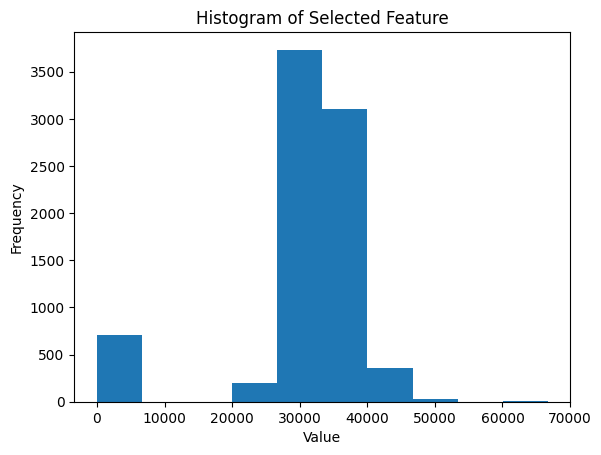

Mean of selected feature: 30028.530737678164
Variance of selected feature: 102499575.920041


In [2]:
import matplotlib.pyplot as plt

selected_feature = features[:, 0]
plt.hist(selected_feature, bins=10)  
plt.title("Histogram of Selected Feature")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()
feature_mean = np.mean(selected_feature)
feature_variance = np.var(selected_feature)

print("Mean of selected feature:", feature_mean)
print("Variance of selected feature:", feature_variance)

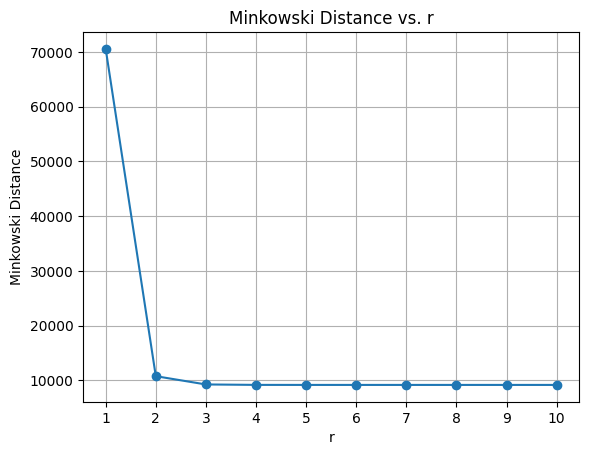

In [3]:
import matplotlib.pyplot as plt
from scipy.spatial.distance import minkowski

def calculate_minkowski_distance(feature_vector1, feature_vector2, r):
    return minkowski(feature_vector1, feature_vector2, r)

r_values = list(range(1, 11))  
distances = []

for r in r_values:
    distance = calculate_minkowski_distance(features[1], features[2], r)  # Using features[0] and features[1]
    distances.append(distance)

plt.plot(r_values, distances, marker='o')
plt.title("Minkowski Distance vs. r")
plt.xlabel("r")
plt.ylabel("Minkowski Distance")
plt.xticks(r_values)
plt.grid(True)
plt.show()


In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset_path = "C:\\Users\\mvy48\\OneDrive\\Desktop\\vscodeprograms\\ml_labsessions\\lab4\\DCT_malayalam_char 1.xlsx"
dataset = pd.read_excel(dataset_path)

features = dataset.iloc[:, :-1].values
labels = dataset.iloc[:, -1].values

class_label_1 = 3353
class_label_2 = 3378

class_1_indices = np.where(labels == class_label_1)[0]
class_2_indices = np.where(labels == class_label_2)[0]

selected_indices = np.concatenate((class_1_indices, class_2_indices))

selected_features = features[selected_indices]
selected_labels = labels[selected_indices]

X_train, X_test, y_train, y_test = train_test_split(selected_features, selected_labels, test_size=0.8)



In [42]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train, y_train)

accuracy = neigh.score(X_test, y_test)

print("Accuracy of kNN classifier:", accuracy)


Accuracy of kNN classifier: 0.9545454545454546


In [43]:
predictions = neigh.predict(X_test)

print("Predicted classes for the test vectors:")
print(predictions)


Predicted classes for the test vectors:
[3378 3378 3378 3353 3378 3378 3353 3378 3378 3378 3378 3378 3378 3353
 3378 3378 3378 3353 3378 3353 3378 3378 3378 3353 3378 3378 3378 3353
 3378 3378 3353 3378 3378 3378 3353 3378 3378 3378 3378 3353 3353 3378
 3378 3378 3378 3378 3378 3353 3378 3378 3378 3378 3378 3378 3378 3378
 3378 3378 3378 3353 3353 3378 3353 3378 3378 3353 3353 3353 3378 3353
 3378 3378 3378 3353 3353 3378 3353 3378 3378 3353 3378 3378 3353 3378
 3378 3378 3378 3378 3378 3378 3378 3353 3378 3353 3378 3378 3353 3353
 3378 3353 3378 3378 3378 3378 3378 3353 3378 3353 3378 3378 3378 3378
 3353 3378 3378 3353 3353 3378 3378 3353 3378 3378 3353 3353 3378 3353
 3378 3378 3378 3353 3378 3378 3378 3378 3378 3378 3378 3353 3378 3353
 3353 3378 3378 3353 3378 3378 3378 3378 3378 3378 3378 3353 3378 3378
 3353 3378 3378 3378 3353 3353 3353 3378 3353 3378 3378 3378 3378 3378
 3353 3353 3378 3378 3378 3378 3353 3378 3378 3378 3378 3353 3378 3353
 3378 3378 3353 3378 3353 3353 3353 3

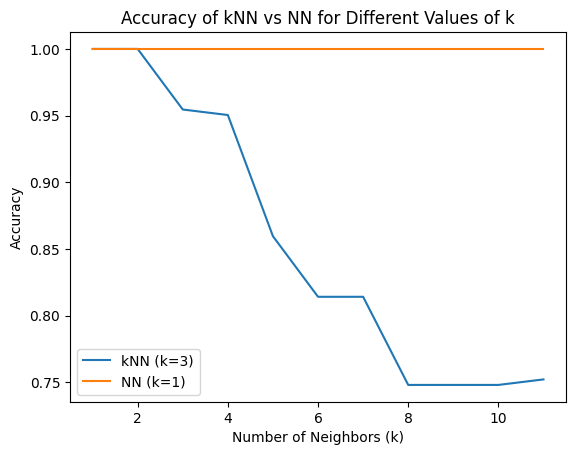

In [44]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

accuracy_kNN = []
accuracy_NN = []

for k in range(1, 12):
    kNN_classifier = KNeighborsClassifier(n_neighbors=k)
    kNN_classifier.fit(X_train, y_train)
    accuracy_kNN.append(kNN_classifier.score(X_test, y_test))
    
    NN_classifier = KNeighborsClassifier(n_neighbors=1)
    NN_classifier.fit(X_train, y_train)
    accuracy_NN.append(NN_classifier.score(X_test, y_test))

plt.plot(range(1, 12), accuracy_kNN, label='kNN (k=3)')
plt.plot(range(1, 12), accuracy_NN, label='NN (k=1)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy of kNN vs NN for Different Values of k')
plt.legend()
plt.show()


In [45]:
from sklearn.metrics import confusion_matrix, classification_report

train_predictions = neigh.predict(X_train)
test_predictions = neigh.predict(X_test)

train_confusion_matrix = confusion_matrix(y_train, train_predictions)
test_confusion_matrix = confusion_matrix(y_test, test_predictions)


print("Confusion Matrix for Training Data:")
print(train_confusion_matrix)
print("\nConfusion Matrix for Test Data:")
print(test_confusion_matrix)


train_classification_report = classification_report(y_train, train_predictions)
test_classification_report = classification_report(y_test, test_predictions)


print("\nClassification Report for Training Data:")
print(train_classification_report)
print("\nClassification Report for Test Data:")
print(test_classification_report)


Confusion Matrix for Training Data:
[[17  2]
 [ 0 41]]

Confusion Matrix for Test Data:
[[ 71  11]
 [  0 160]]

Classification Report for Training Data:
              precision    recall  f1-score   support

        3353       1.00      0.89      0.94        19
        3378       0.95      1.00      0.98        41

    accuracy                           0.97        60
   macro avg       0.98      0.95      0.96        60
weighted avg       0.97      0.97      0.97        60


Classification Report for Test Data:
              precision    recall  f1-score   support

        3353       1.00      0.87      0.93        82
        3378       0.94      1.00      0.97       160

    accuracy                           0.95       242
   macro avg       0.97      0.93      0.95       242
weighted avg       0.96      0.95      0.95       242

